In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter, laplace, sobel, binary_erosion, binary_dilation, binary_opening, binary_closing
from scipy import ndimage
import imageio

# Load and convert image
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"  # Change this to your image path
image = imageio.imread(image_path)

# Convert to grayscale if it's a color image
if image.ndim == 3:
    image = np.mean(image, axis=2)




C:\Users\abhi1\AppData\Local\Temp\ipykernel_16428\2083837768.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


1. Image Enhancement
Histogram Equalization (Contrast Adjustment)

In [60]:
def histogram_equalization(image):
    histogram, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()
    image_equalized = np.interp(image.flatten(), bin_edges[:-1], cdf_normalized)
    return image_equalized.reshape(image.shape)

enhanced_image = histogram_equalization(image)


# 2. Image Noise Removal and Image Restoration
# Gaussian and Median Filtering
gaussian_filtered_image = gaussian_filter(image, sigma=2)
median_filtered_image = median_filter(image, size=3)

# 3. Morphological Techniques
# Erosion and Dilation
binary_image = image > 128  # Simple thresholding
eroded_image = binary_erosion(binary_image, structure=np.ones((3,3)))
dilated_image = binary_dilation(binary_image, structure=np.ones((3,3)))

# 4. Image Encoding and Compression (Optional)
# In this case, saving the compressed image using scipy's imageio (no additional compression available in scipy)
compressed_image_path = r"C:\Users\abhi1\Desktop\DIP\img2.jpg"
imageio.imwrite(compressed_image_path, image.astype(np.uint8), format='jpg')


(-0.5, 1599.5, 1199.5, -0.5)

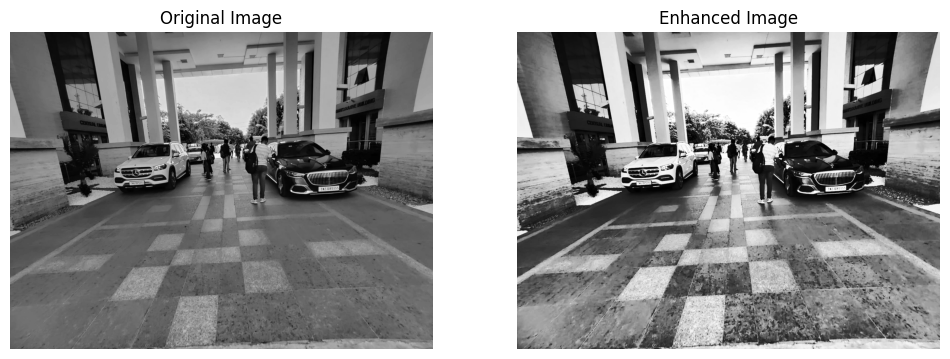

In [61]:

# Display images
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Original Image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Enhanced Image
ax[1].imshow(enhanced_image, cmap='gray')
ax[1].set_title('Enhanced Image')
ax[1].axis('off')


(-0.5, 1599.5, 1199.5, -0.5)

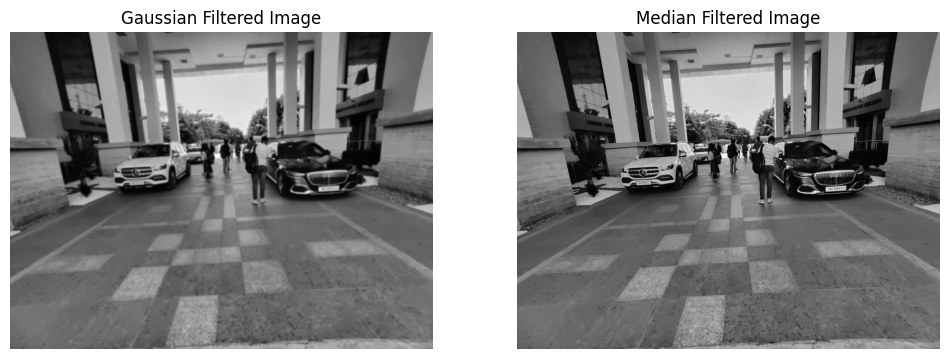

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12,10))

# Noise Removal - Gaussian
ax[0].imshow(gaussian_filtered_image, cmap='gray')
ax[0].set_title('Gaussian Filtered Image')
ax[0].axis('off')

# Noise Removal - Median
ax[1].imshow(median_filtered_image, cmap='gray')
ax[1].set_title('Median Filtered Image')
ax[1].axis('off')


(-0.5, 1599.5, 1199.5, -0.5)

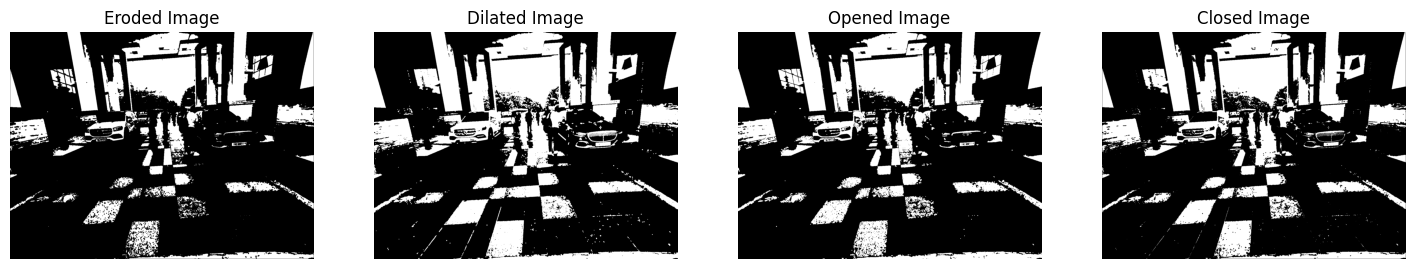

In [63]:
fig, ax = plt.subplots(1,4, figsize=(18, 12))

# Morphology - Erosion
ax[0].imshow(eroded_image, cmap='gray')
ax[0].set_title('Eroded Image')
ax[0].axis('off')

# Morphology - Dilation
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')

# Morphology - Opening
opened_image = binary_opening(binary_image, structure=np.ones((3,3)))
ax[2].imshow(opened_image, cmap='gray')
ax[2].set_title('Opened Image')
ax[2].axis('off')

# Morphology - Closing
closed_image = binary_closing(binary_image, structure=np.ones((3,3)))
ax[3].imshow(closed_image, cmap='gray')
ax[3].set_title('Closed Image')
ax[3].axis('off')


C:\Users\abhi1\AppData\Local\Temp\ipykernel_16428\1226380242.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  compressed_image = imageio.imread(compressed_image_path)


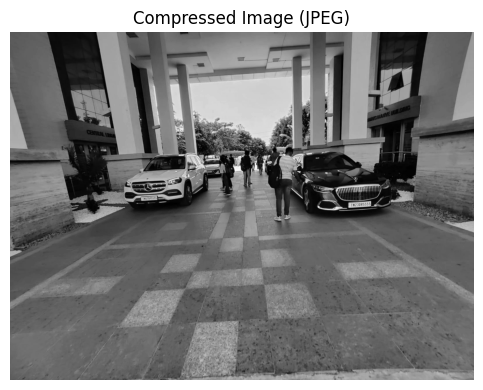

In [64]:
fig, ax = plt.subplots(figsize=(6, 4))

# Compression Result Display (no actual compression, saving with imageio)
compressed_image = imageio.imread(compressed_image_path)
ax.imshow(compressed_image, cmap='gray')
ax.set_title('Compressed Image (JPEG)')
ax.axis('off')

plt.tight_layout()
plt.show()



In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter, laplace, sobel

# Load an example image
image = plt.imread(r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg")

# Convert to grayscale if it's a color image
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Blurring the image using a Gaussian filter
blurred_image = gaussian_filter(image, sigma=2)

# Sharpening the image using a Laplacian filter
laplacian_filtered = laplace(image)
sharpened_image = image - laplacian_filtered

# Edge detection using Sobel filter
sobel_x = sobel(image, axis=0)
sobel_y = sobel(image, axis=1)
edges = np.hypot(sobel_x, sobel_y)


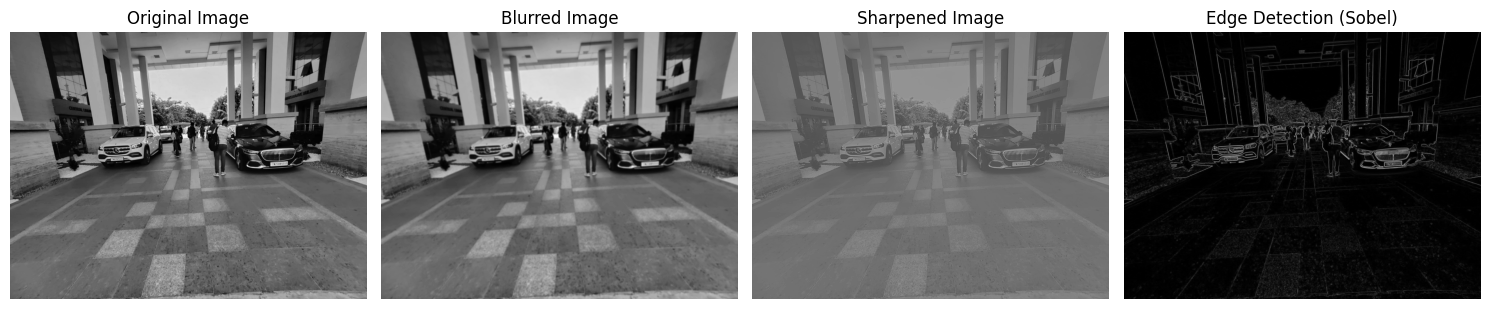

In [66]:

# Plot the original and enhanced images
fig, ax = plt.subplots(1, 4, figsize=(15, 5))


ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title('Blurred Image')
ax[1].axis('off')

ax[2].imshow(sharpened_image, cmap='gray')
ax[2].set_title('Sharpened Image')
ax[2].axis('off')

ax[3].imshow(edges, cmap='gray')
ax[3].set_title('Edge Detection (Sobel)')
ax[3].axis('off')

plt.tight_layout()
plt.show()

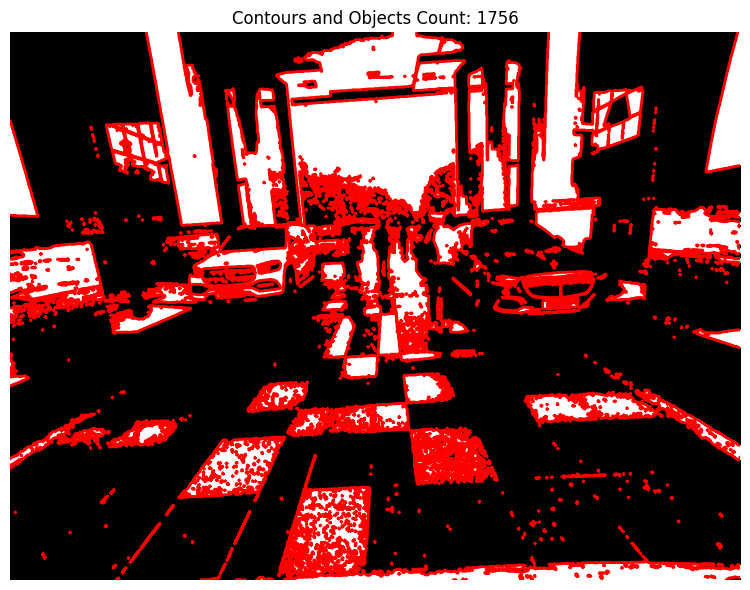

In [67]:
from scipy.ndimage import gaussian_filter, median_filter, laplace, sobel, binary_erosion, binary_dilation, binary_opening, binary_closing, label
from skimage.measure import find_contours

# 5. Image Contouring and Object Counting
def contour_and_count_objects(binary_image):
    labeled_image, num_objects = label(binary_image)
    contours = find_contours(binary_image, level=0.5)
    return labeled_image, num_objects, contours

labeled_image, num_objects, contours = contour_and_count_objects(binary_image)

# Plot contours and objects
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(binary_image, cmap='gray')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], color='r', linewidth=2)
ax.set_title(f'Contours and Objects Count: {num_objects}')
ax.axis('off')
plt.tight_layout()
plt.show()